<a href="https://colab.research.google.com/github/ImranSaleh91/CS483L/blob/main/HW1Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Book1.csv to Book1 (4).csv
    Age(Years)  Weight(KG)  SBP(mm Hg)
0           60          58         117
1           61          90         120
2           74          96         145
3           57          72         129
4           63          62         132
5           68          79         130
6           66          69         110
7           77          96         163
8           63          96         136
9           54          54         115
10          63          67         118
11          76          99         132
12          60          74         111
13          61          73         112


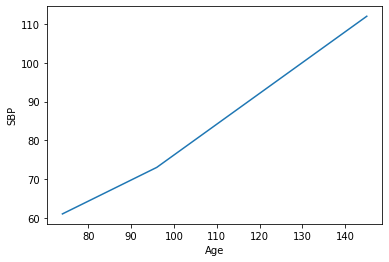

Cost:  [[0.18179949 0.18646102 0.22530707 0.2004456  0.20510712 0.20199944
  0.1709226  0.25327622 0.21132249 0.17869181 0.18335334 0.20510712
  0.17247644 0.17403029]
 [0.18646102 0.19124207 0.23108417 0.20558523 0.21036628 0.20717891
  0.17530523 0.25977048 0.21674101 0.18327365 0.1880547  0.21036628
  0.17689892 0.1784926 ]
 [0.22530707 0.23108417 0.27922671 0.24841548 0.25419259 0.25034118
  0.21182716 0.31388933 0.26189539 0.22145566 0.22723277 0.25419259
  0.21375286 0.21567856]
 [0.2004456  0.20558523 0.24841548 0.22100412 0.22614375 0.22271733
  0.18845313 0.27925327 0.23299659 0.19701918 0.20215881 0.22614375
  0.19016634 0.19187955]
 [0.20510712 0.21036628 0.25419259 0.22614375 0.23140291 0.2278968
  0.19283576 0.28574753 0.23841512 0.20160102 0.20686017 0.23140291
  0.19458881 0.19634186]
 [0.20199944 0.20717891 0.25034118 0.22271733 0.2278968  0.22444382
  0.189914   0.28141802 0.23480277 0.19854646 0.20372593 0.2278968
  0.19164049 0.19336698]
 [0.1709226  0.17530523 0.211

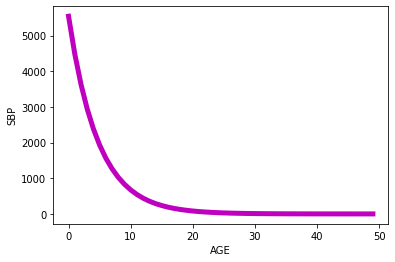

SBP [116.3970083  119.38154698 144.25270259 128.335163   131.31970167
 129.33000922 109.43308473 162.15993464 135.29908657 114.40731585
 117.39185453 131.31970167 110.42793095 111.42277718]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#variables to store mean and standard deviation for each feature
mu = []
std = []
from google.colab import files
 
 
uploaded = files.upload()
import io
 
df = pd.read_csv(io.BytesIO(uploaded['Book1.csv']))
print(df)

def load_data():
	df = pd.read_csv('Book1.csv')
	df.columns = ["Age(Years)", "Weight(KG)", "SBP(mm Hg)"]
	data = np.array(df, dtype=float)
	plot_data(data[2], data[-1])
	normalize(data)
	return data[:,:2], data[:, -1]

def plot_data(x, y):
	plt.xlabel('Age')
	plt.ylabel('SBP')
	plt.plot(x, y)
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))


def h(x,theta):
	return np.matmul(x, theta)

def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

def plot_SBP(J_all, num_epochs):
	plt.xlabel('AGE')
	plt.ylabel('SBP')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("SBP", y)

x,y = load_data()
#y = np.reshape(y)
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_SBP(jplot, n_epochs)

test(theta, [1600, 3])